In this project i am just going to revise the functions, methods, and steps involved in performing a simple linear regression.

The dataset used is again 'Height-Weight' where we need to predict high by given weight.

In [13]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df = pd.read_csv('height-weight.csv')

In [15]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


---

In [16]:
# Verify that the two variables are linearly correlated 
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


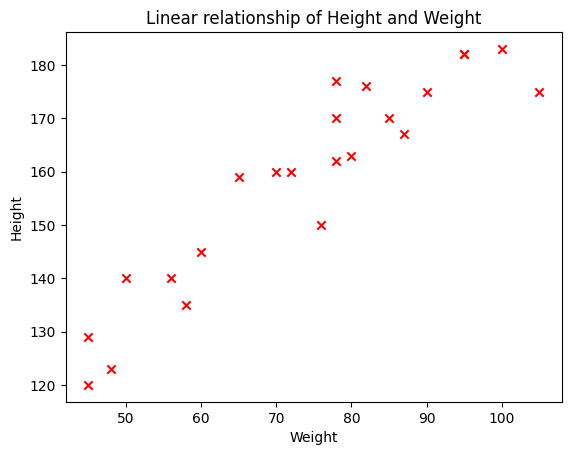

In [17]:
plt.scatter(df['Weight'], df['Height'], marker='x', color='red')
plt.title('Linear relationship of Height and Weight')
plt.xlabel('Weight')
plt.ylabel('Height')
plt.show()

*We can clearly see from the diagram that both Independent Feature (`Height`) and Dependent Feature ('Weight`) are positively correlated by 93%.*

---

In [18]:
# Seperate the dataset as Independent Feature (X) and Dependent Feature (y)
X = df[['Weight']]
y = df['Height']

---

In [22]:
# Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.20)

print(f'The Dataset originally had {X.shape} rows. After the split data got divided into 2 parts Training Dataset (80%) and Testing Dataset (20%)')
print(f'X Train: {X_train.shape}')
print(f'X Test: {X_test.shape}')
print(f'y Train: {y_train.shape}')
print(f'y Test: {y_test.shape}')

The Dataset originally had (23, 1) rows. After the split data got divided into 2 parts Training Dataset (80%) and Testing Dataset (20%)
X Train: (18, 1)
X Test: (5, 1)
y Train: (18,)
y Test: (5,)


---

In [20]:
# Standardize the data (training data 'X_train')
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [23]:
X_train_scaled

array([[ 1.73689094],
       [-0.92026952],
       [ 1.4542143 ],
       [ 0.21043706],
       [-1.48562281],
       [ 1.17153765],
       [-1.6552288 ],
       [-0.80719886],
       [-0.24184557],
       [ 0.0973664 ],
       [-1.37255215],
       [-1.03334018],
       [-0.12877492],
       [ 0.88886101],
       [ 0.43657837],
       [ 0.60618436],
       [ 0.71925502],
       [ 0.32350772]])

In [24]:
X_test_scaled

array([[ 0.21043706],
       [ 0.21043706],
       [-1.6552288 ],
       [ 1.17153765],
       [-0.52452222]])

---

In [25]:
# Lets Train the model (Simple Linear Regression model)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [26]:
linreg = LinearRegression()

In [27]:
linreg.fit(X_train_scaled, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [28]:
print(f'The slope or intercept of weight is:', linreg.coef_)
print(f'Intercept: ', linreg.intercept_)

The slope or intercept of weight is: [17.03440872]
Intercept:  157.5


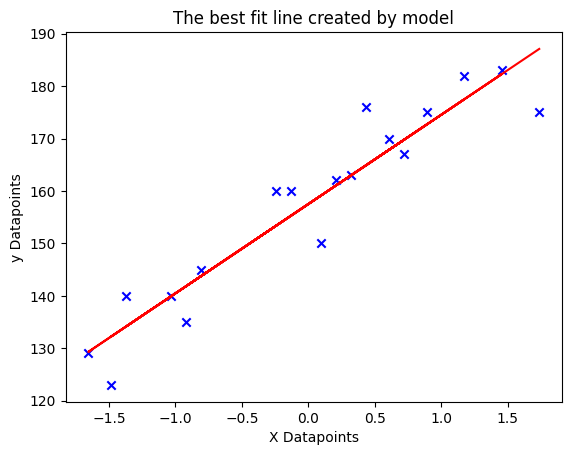

In [29]:
plt.scatter(X_train_scaled, y_train, color='blue', marker='x')
plt.plot(X_train_scaled, linreg.predict(X_train_scaled), 'r')
plt.title('The best fit line created by model')
plt.xlabel('X Datapoints')
plt.ylabel('y Datapoints')
plt.show()

##### Prediction of train data

1. *predicted height output* = `intercept_` + `coef_` (`Weight`)

2. *y_pred_train* = 157.5 + 17.03 (X_train_scaled)

---

##### Prediction of test data

1. *predicted height output* = `intercept_` + `coef_` (`Weight`)

2. *y_pred_test* = 157.5 + 17.03 (X_test_scaled)

In [30]:
y_pred = linreg.predict(X_test_scaled)

In [31]:
y_pred

array([161.08467086, 161.08467086, 129.3041561 , 177.45645118,
       148.56507414])

---

In [33]:
# Performance Metrices

MAE = mean_absolute_error(y_test, y_pred)

print(f"Mean Absolute Error: {MAE}")


Mean Absolute Error: 9.822657814519232


In [34]:
MSE = mean_squared_error(y_test, y_pred)

print(f'Mean Squared Error: {MSE}')

Mean Squared Error: 109.77592599051664


In [35]:
RMSE = np.sqrt(MSE)

print(f'Root Mean Squared Error: {RMSE}')

Root Mean Squared Error: 10.477400726827081


---

In [36]:
# Compute the Accuracy of model using R Squared


score = r2_score(y_test, y_pred)

print(f'R Squared: {score}')

R Squared: 0.776986986042344


In [41]:
adj_r2 = 1 - (1 - score) * (len(y_test)  - 1)/ (len(y_test) - X_test.shape[1] -1)

print(f'Adjusted R2: {adj_r2}')

Adjusted R2: 0.7026493147231252


---

In [44]:
# Predicting Height for unseen/ new weight

scaled_weight = scaler.transform([[80]])
print(scaled_weight)

[[0.32350772]]


c:\Users\ASUS\anaconda3\envs\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [45]:
print(f'Predicted Height for 80 weight: {linreg.predict(scaled_weight)}')

Predicted Height for 80 weight: [163.01076266]


---

##### Assumptions in Linear Regression:

*When do you say you have train the model well?*

1. When you predicted points against real points and you get a scatter plot that shows linear relationship between variables then you can say you have trained the model well.

Example:

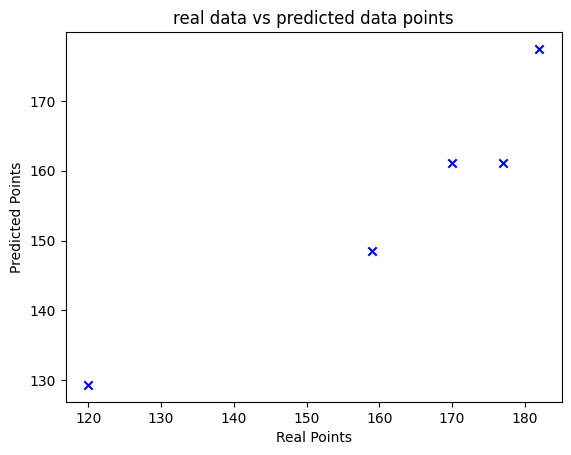

In [48]:
plt.scatter(y_test, y_pred, color='blue', marker='x')
plt.title('real data vs predicted data points')
plt.xlabel('Real Points')
plt.ylabel('Predicted Points')
plt.show()

2. When we calculate residuals (error) of the model which we get my substracting predicted points from real points and we plot that residuals using a hist, distplot or any other plot where we can see kernel density. And that density is normal i.e. the residual has normal distribution that the model is trained well.

Example:

In [49]:
residuals = y_test - y_pred
print(residuals)

15    15.915329
9      8.915329
0     -9.304156
8      4.543549
17    10.434926
Name: Height, dtype: float64


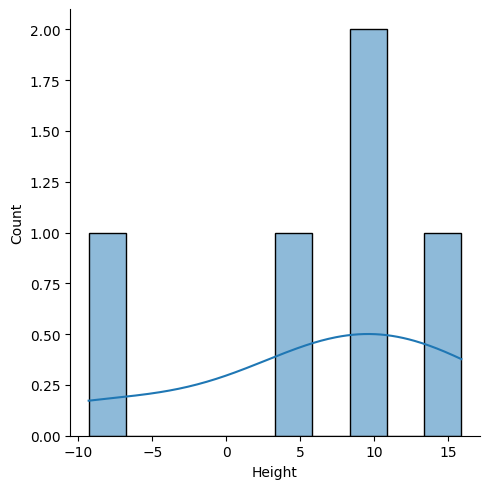

In [53]:
# Increase bins or set a specific bin width to see individual points better
sns.displot(residuals, kde=True, bins=10)

In our case the data is ledt skewed probably because lack of data points and most of the point gathering on the right top corner.

3. When we plot predicted points againts residuals and we get an uniform distribution (spread out evenly across the entire range) then we can say the model is performing well.

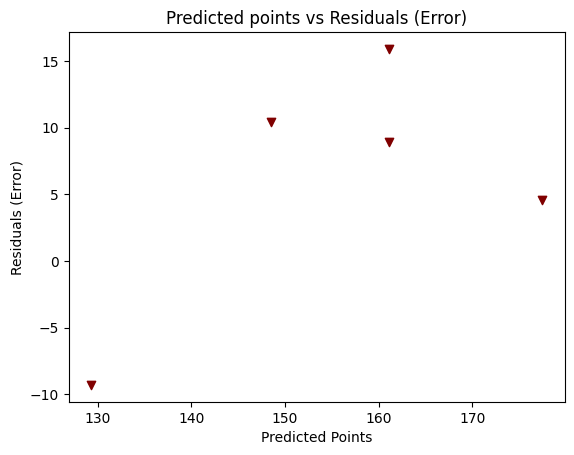

In [54]:
plt.scatter(y_pred, residuals, color='maroon', marker='v')
plt.title('Predicted points vs Residuals (Error)')
plt.xlabel('Predicted Points')
plt.ylabel('Residuals (Error)')
plt.show()